### Classification
This classification is done by ANN (neural network having 5 hidden nodes)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipynb.fs.full.process import get_data
from sklearn.utils import shuffle

In [22]:
def softmax(a) :
    aExp = np.exp(a)
    return aExp / aExp.sum(axis = 1, keepdims = True)

def forward(X, W1, b1, W2, b2) :
    z = np.tanh(X.dot(W1) + b1) #z = (N X M)
    return softmax(z.dot(W2) + b2), z  # y = (N X K)

def derivate_W2(T, Y, Z):
    return Z.T.dot(T - Y)

def derivate_b2(T, Y) :
    return np.sum(T - Y, axis = 0)

def derivate_W1(X, T, Y, W2, Z) :
    return X.T.dot((T - Y).dot(W2.T) * Z * (1- Z))  #if we take sigmoid function

def derivate_b1(T, Y, W2, Z): #same as W1 except for X(or if X was 1)
    return np.sum((T - Y).dot(W2.T) * Z * (1- Z), axis = 0)

def classification_rate(T, Y) :
    return np.mean(T == Y)

def cross_entropy(T, Y) :
    return - np.mean(T * np.log(Y))

def t2indicator(Yin) :
    N = Yin.shape[0]
    K = Yin.max() + 1
    Yout = np.zeros((N, K))
    
    for i in range(N) :
        Yout[i, Yin[i]] = 1
    return Yout

def predict(P_Y_given_X) :
    return np.argmax(P_Y_given_X, axis = 1)

0   0.332015271046128   0.3356675634742293
1000   0.07744855061487911   0.08565880428805425
2000   0.07043398663874523   0.07773311701900792
3000   0.06686764856501709   0.07591117328859548
4000   0.05214873161019233   0.05336651108308519
5000   0.050291114633025026   0.05791424062329549
6000   0.052625175941535145   0.0566485059300213
7000   0.05328789075121585   0.06101913472679204
8000   0.05352184158971106   0.061093170544623876
9000   0.05364545355556455   0.05863510999483457
10000   0.05225982107900977   0.05809198561547606
11000   0.051000984090876604   0.05749205120008207
12000   0.0497660858106985   0.05697730376530351
13000   0.04911692172784425   0.056456682037345496
14000   0.04878948583761962   0.05465002899827215
15000   0.048898298336455016   0.053966260337186586
16000   0.04862160064731292   0.052220305854007255
17000   0.04789515043568059   0.05156523697519785
18000   0.04674146497051848   0.05257131645378275
19000   0.04601414985705007   0.05145376776278424
Final trai

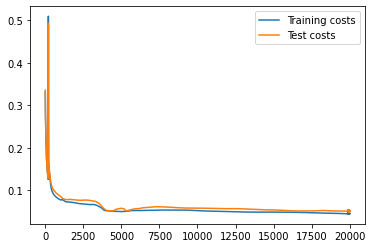

In [28]:
X, T = get_data()
X, T = shuffle(X, T)
T = T.astype(np.int32)

Xtrain = X[:-100]
Ttrain = T[:-100]
Ttrain_ind = t2indicator(Ttrain)

Xtest = X[-100:]
Ttest = T[-100:]
Ttest_ind = t2indicator(Ttest)

N = X.shape[0]
D = X.shape[1]
M = 5 #no of hidden nodes
K = len(set(T)) #no of classes

W1 = np.random.randn(D, M) / np.sqrt(D * K)
b1 = np.random.randn(M) / np.sqrt(M)
W2 = np.random.randn(M, K) /  np.sqrt(M * K)
b2 = np.random.randn(K) / np.sqrt(K)

#training
train_costs = []
test_costs = []
learning_rate = 0.001
epochs = 20000

for i in range(epochs) :
    Ytrain, Ztrain = forward(Xtrain, W1, b1, W2, b2)
    Ytest, Ztest = forward(Xtest, W1, b1, W2, b2)
    
    ctrain = cross_entropy(Ttrain_ind, Ytrain)
    ctest = cross_entropy(Ttest_ind, Ytest)
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    W1 += learning_rate * derivate_W1(Xtrain, Ttrain_ind, Ytrain, W2, Ztrain)
    b1 += learning_rate * derivate_b1(Ttrain_ind, Ytrain, W2, Ztrain)
    W2 += learning_rate * derivate_W2(Ttrain_ind, Ytrain, Ztrain)
    b2 += learning_rate * derivate_b2(Ttrain_ind, Ytrain)
    
    if i % 1000 == 0 :
        print(i, ' ', ctrain, ' ', ctest)
        
print('Final training classification rate : ', classification_rate(Ttrain, predict(Ytrain)))
print('Final testing classification rate : ', classification_rate(Ttest, predict(Ytest)))

plt.plot(train_costs, label = 'Training costs')
plt.plot(test_costs, label = 'Test costs')
plt.legend()

In [27]:
train_costs

[0.41374816111653673,
 0.36406573523691066,
 0.33602910693149796,
 0.31847893308714265,
 0.306290174072033,
 0.2971693666334852,
 0.2900179953934028,
 0.2842460878217543,
 0.27949491007327504,
 0.2755208273426915,
 0.2721431609320682,
 0.2692195066837037,
 0.26663403851922657,
 0.2642921076173487,
 0.26211752368318997,
 0.2600505651716236,
 0.25804588435429576,
 0.25607017313344194,
 0.25409977446309406,
 0.25211847411147015,
 0.2501156285473837,
 0.24808468197023284,
 0.24602204961717916,
 0.24392630586396308,
 0.24179760576288536,
 0.23963727503830415,
 0.23744751638253617,
 0.23523119339896859,
 0.232991665132796,
 0.23073265311263252,
 0.22845812939210977,
 0.22617221871961227,
 0.22387911117031628,
 0.22158298373593763,
 0.21928793075101935,
 0.21699790381038014,
 0.21471666211068324,
 0.21244773401573228,
 0.21019439018897684,
 0.20795962796596545,
 0.2057461658844165,
 0.2035564465925849,
 0.2013926458513422,
 0.19925668513032374,
 0.19715024541239906,
 0.19507478022964103,
 0.1